![alt text](uspas.png)
# Fundamentals of Accelerator Physics and Technology 
### (with Simulations and Measurements Lab)
# Experimental Lab: Measuring Beam Distributions
##### Author: K. Ruisard and A. Zhukov

## We will be measuring the beam distribution as both 1D profiles as well as the phase space distribution. Measurements will be conducted on the SNS Beam Test Facility (BTF), using Zoom and screen-sharing to enable remote control over the experiment. Additionally, as part of the lab report, simulations of the BTF will be performed in OPAL using the [Sirepo](https://beta.sirepo.com) environment. Questions to be turned in for credit are in **bold** and numbered.

### Python Notes: 
- You wont need much python specific code for this lab, but here are some tips:
- Press shift+enter to execute a cell, or use the play button at the top of the window
- Make sure you exectue cells in order, or re-exectue cells if you change something at the top of the notebook.
- You can also exectue the whole notebook by using 'Run all cells' under the 'Run' tab.
----------

In [ ]:
% matplotlib inline

## 1. Introduction to SNS Beam Test Facility



## 2. Measuring beam response to quadrupole strength

After the RFQ, a series of four quadrupoles are used to contain and control the transverse beam size. Each quadrupole focuses in one plane and defocuses in the other. Near the end of a linac, quadrupoles will be optimized for desired beam size on target or for matched injection into a ring. Along the linac, quadrupoles are set to maintain a well-focused beam and minimize losses during acceleration stages.  

We will systematically vary quadrupole strength for two of the quadrupoles, and measure the 1D profiles using the slit-scan technique. We will compare our measurements of profile width to predictions generated by simulation.










This plot shows evolution of beam rms sizes between the RFQ exit and the first set of slits.
The location of the four quadrupoles is indicated in the drawing. Quadrupole polarity is indicated by the shape.


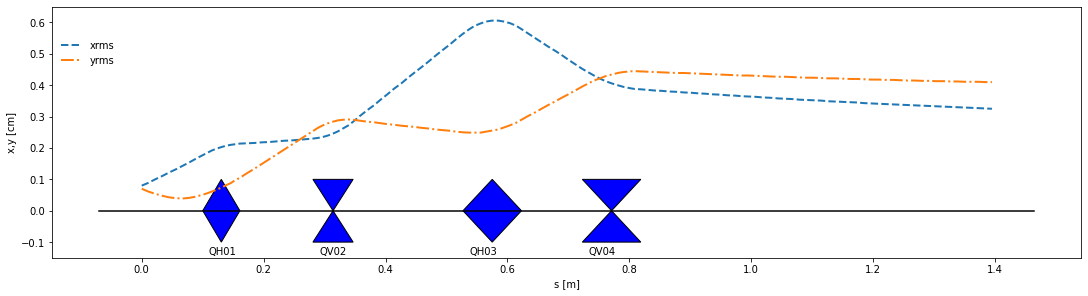

In [23]:
## Ignore this code box; This produces the plot of beam size vs s

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print('This plot shows evolution of beam rms sizes between the RFQ exit and the first set of slits.')

filename = 'data_beam_evolution_32mA_pyorbit'
names = ['s','n','xrms','yrms','zrms','ax','bx','ex','ay','by','ey','az','bz','ez','sx','sy','sxx','syy','sxy','r90','r99']
df = pd.read_csv(filename,sep='\s+',names=names,skiprows=1)


fig,ax1 = plt.subplots(constrained_layout=True,figsize=[15,4])
ax1.plot(df['s'],df['xrms'],label='xrms',linestyle='--',linewidth=2)
ax1.plot(df['s'],df['yrms'],label='yrms',linestyle='-.',linewidth=2)
ax1.set_xlabel('s [m]')
ax1.set_ylabel('x,y [cm]')
plt.legend(loc='upper left',bbox_to_anchor=(0,1),frameon=False)
ax1.set_ylim([-.15,.65])

plt.legend(loc='upper left',bbox_to_anchor=(0,.9),frameon=False);


# -- draw lattice
from matplotlib.patches import Polygon

print('The location of the four quadrupoles is indicated in the drawing. Quadrupole polarity is indicated by the shape.')

maglist = []
maglist.append([.1306, .061, 1,  'QH01'])
maglist.append([.3139, .066, -1, 'QV02'])
maglist.append([.5751, .096, 1,  'QH03'])
maglist.append([.7709, .096, -1, 'QV04'])

def magparse(magval):
    s0 = magval[0] -.5*magval[1]
    s1 = magval[0] + .5*magval[1]
    i = magval[2]
    name = magval[3]
    return (s0,s1,i,name)

def drawmag(magval,h):
    
    if not(type(h)==list):
        h = [-h,h]
    
    s0,s1,i,name = magparse(magval)
    c = magval[0]
    m = 0.5*(h[0]+h[1])
    
    if i==1: #Positive quad
        pts = np.array([[s0,m],[c,h[1]],[s1,m],[c,h[0]]])
    elif i==-1: # negative quad
        pts = np.array([[c,m],[s0,h[1]],[s1,h[1]],[c,m],[s1,h[0]],[s0,h[0]]])
        
    plt.text(s0+.01,h[0]-.04,name,color='k')


    
    p = Polygon(pts, fc='blue',ec="black")
    ax = plt.gca()
    ax.add_patch(p)

h=[-.1,.1]; 
plt.sca(ax1)
plt.plot(plt.xlim(),[0.5*(h[0]+h[1]),0.5*(h[0]+h[1])],'k')
for mag in maglist:
    drawmag(mag,h)
    





Open simulation sns-btf-mebt. Copy it to your own session (there should be a prompt).:
> https://www.sirepo.com/opal#/lattice/HdMZdgoF

## 3. Measuring beam phase space distribution

